In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot

In [3]:
data = pd.read_csv('D:/Matlab/train.csv')

In [4]:
data = np.array(data)

In [5]:
data = np.array(data)

In [6]:
m, n = data.shape  # rows and columns
np.random.shuffle(data) # make the ordering random

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [7]:
def init_params():   # initializing random weights and bias
    W1 = np.random.rand(10,784) - 0.5 # 10 X 784 array (weight one)
    b1 = np.random.rand(10,1) - 0.5 # 10 X 1 array     (bias one)
    W2 = np.random.rand(10,10) - 0.5 # 10 X 10 array   (weight two)
    b2 = np.random.rand(10,1) - 0.5 # 10 X 1 array    (bias two)
    return W1, W2, b1, b2

def softmax(Z):   
    prob = 1 / (1 + np.exp(-Z))
    return prob

def forwardProp(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)          # activation function
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    
    return Z1, A1, Z2, A2
    
def ReLU(Z):
    return np.maximum(Z, 0)

def setupY(Y):
    setup_Y = np.zeros((Y.size, Y.max()+1)) # creates a matrix of m X 1 size
    setup_Y[np.arange(Y.size), Y] = 1 # whatever number is Y, its corresponding index is set to 1
    setup_Y = setup_Y.T
    return setup_Y

def diffReLU(Z): # if Z > 0, return 1, else return 0 (deriv of Z)
    return Z > 0

def backProp(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    requiredOut = setupY(Y)
    dZ2 = A2 - requiredOut
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1/ m * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * diffReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1/ m * np.sum(dZ1)
    
    return dW1, db1, dW2, db2
    
def updateParam(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    
    return W1, b1, W2, b2

def gradDes(X, Y, itr, alpha):
    
    W1, W2, b1, b2 = init_params()
    for i in range(itr):
        Z1, A1, Z2, A2 = forwardProp(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backProp(Z1, A1, Z2, A2, W2, X, Y)
        
        W1, b1, W2, b2 = updateParam(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            print("Iterations: ", i)
            pred = getPrediction(A2)
            print("Accuracy: ", getAccuracy(pred, Y))
            
    return W1, b1, W2, b2
    
def getAccuracy(pred, Y):
    print(pred, Y)
    
    return np.sum(pred == Y) / Y.size

def getPrediction(A2):
    return np.argmax(A2, 0)

In [8]:
W1, b1, W2, b2 = gradDes(X_train, Y_train, 500, 0.1)

Iterations:  0
[6 6 6 ... 6 6 6] [1 1 2 ... 5 6 3]
Accuracy:  0.10634146341463414
Iterations:  10
[3 0 0 ... 6 0 9] [1 1 2 ... 5 6 3]
Accuracy:  0.18178048780487804
Iterations:  20
[3 0 0 ... 6 0 9] [1 1 2 ... 5 6 3]
Accuracy:  0.2551951219512195
Iterations:  30
[1 1 0 ... 2 0 9] [1 1 2 ... 5 6 3]
Accuracy:  0.32695121951219513
Iterations:  40
[1 1 0 ... 2 0 8] [1 1 2 ... 5 6 3]
Accuracy:  0.39407317073170733
Iterations:  50
[1 1 0 ... 2 6 8] [1 1 2 ... 5 6 3]
Accuracy:  0.46270731707317075
Iterations:  60
[1 1 6 ... 0 6 8] [1 1 2 ... 5 6 3]
Accuracy:  0.5255365853658537
Iterations:  70
[1 1 6 ... 0 6 8] [1 1 2 ... 5 6 3]
Accuracy:  0.5784634146341463
Iterations:  80
[1 1 2 ... 0 6 8] [1 1 2 ... 5 6 3]
Accuracy:  0.615780487804878
Iterations:  90
[1 1 2 ... 0 6 8] [1 1 2 ... 5 6 3]
Accuracy:  0.6436341463414634
Iterations:  100
[1 1 2 ... 0 6 8] [1 1 2 ... 5 6 3]
Accuracy:  0.6634390243902439
Iterations:  110
[1 1 2 ... 8 6 8] [1 1 2 ... 5 6 3]
Accuracy:  0.6813414634146342
Iterations:

In [14]:
def makePred(X, W1, W2, b1, b2):
    _, _, _, A2 = forwardProp(W1, b1, W2, b2, X)
    predict = getPrediction(A2)
    return predict

def testPred(index, W1, b1, W2, b2):
    currImg = X_train[:, index, None]
    prediction = makePred(currImg, W1, W2, b1, b2)
    label = Y_train[index]
    
    print("Prediction :", prediction)
    print("Label: ", label)
    
    currImg = currImg.reshape((28, 28)) * 255
    plot.gray()
    plot.imshow(currImg, interpolation='nearest')
    plot.show

Prediction : [8]
Label:  8


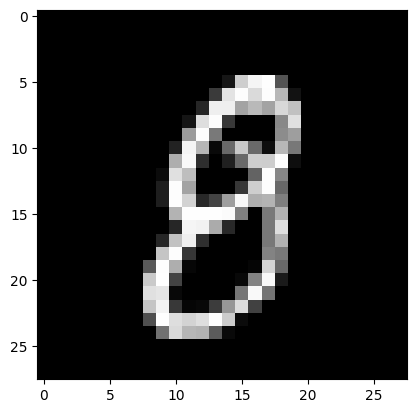

In [21]:
testPred(34, W1, b1, W2, b2)

In [11]:
devPreds = makePred(X_dev, W1, W2, b1, b2)
getAccuracy(devPreds, Y_dev)

[0 1 9 5 0 7 7 4 2 4 8 3 8 5 6 1 0 4 3 6 4 3 9 4 3 4 6 9 5 0 0 1 7 5 1 5 4
 9 9 2 6 3 2 8 8 5 2 4 7 6 9 2 4 6 7 0 3 1 7 6 0 6 8 7 4 4 3 9 4 9 7 5 0 0
 0 6 9 5 6 0 5 2 0 8 7 6 1 9 9 1 7 9 0 3 0 0 5 9 2 4 8 7 3 0 1 8 2 7 7 0 7
 3 1 6 5 8 0 0 9 8 2 1 8 2 8 5 1 2 5 7 5 6 1 5 4 2 1 5 4 4 5 3 9 6 6 9 2 2
 2 9 3 8 6 1 2 1 5 9 6 6 0 1 1 5 2 8 5 8 8 1 6 1 7 7 7 4 6 4 3 3 0 1 8 4 6
 2 9 8 4 0 0 3 6 4 6 6 7 8 7 8 8 9 9 6 5 4 3 1 3 6 1 7 7 9 3 9 5 0 4 5 9 8
 7 8 2 5 0 4 7 7 5 0 1 3 1 2 1 2 3 8 4 2 5 9 8 8 8 3 2 1 9 8 2 3 7 6 5 9 4
 3 5 8 0 4 9 6 3 0 6 3 2 2 3 8 4 6 3 6 9 0 1 2 1 6 7 1 5 6 1 2 8 8 2 7 1 2
 0 6 1 6 1 2 1 5 3 3 5 3 8 0 2 1 3 8 4 2 1 0 4 0 0 9 1 1 3 6 2 2 1 4 2 0 6
 2 1 0 5 2 7 1 9 4 2 7 1 7 5 0 5 6 1 7 4 6 2 0 7 3 8 3 5 9 7 9 5 3 2 4 8 5
 4 1 0 3 9 0 0 0 2 3 8 4 6 5 7 2 7 8 1 6 9 3 1 8 1 1 8 4 2 9 4 8 2 0 4 6 8
 6 1 4 4 5 7 5 8 1 0 4 0 1 7 9 0 4 8 3 2 2 5 2 4 1 4 4 4 5 3 0 2 4 4 7 3 5
 9 2 8 4 7 8 5 7 9 3 5 2 2 0 0 2 0 8 2 8 1 2 9 1 6 6 9 3 1 7 5 4 2 3 5 6 6
 5 2 8 7 5 4 4 0 1 1 1 4 

0.834